# 1. Import Library

# 資料準備

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
import re
re_tag = re.compile(r'<[^>]+>')

def rm_tags(text):
    return re_tag.sub('', text)

In [3]:
import os
def read_files(filetype):
    path = "data/aclImdb/"
    file_list=[]

    positive_path=path + filetype+"/pos/"
    for f in os.listdir(positive_path):
        file_list+=[positive_path+f]
    
    negative_path=path + filetype+"/neg/"
    for f in os.listdir(negative_path):
        file_list+=[negative_path+f]
        
    print('read',filetype, 'files:',len(file_list))
       
    all_labels = ([1] * 12500 + [0] * 12500) 
    
    all_texts  = []
    
    for fi in file_list:
        with open(fi,encoding='utf8') as file_input:
            all_texts += [rm_tags(" ".join(file_input.readlines()))]
            
    return all_labels,all_texts

In [4]:
y_train,train_text=read_files("train")

read train files: 25000


In [5]:
y_test,test_text=read_files("test")

read test files: 25000


In [6]:
token = Tokenizer(num_words=2000)
token.fit_on_texts(train_text)

In [7]:
x_train_seq = token.texts_to_sequences(train_text)
x_test_seq  = token.texts_to_sequences(test_text)

In [8]:
x_train = sequence.pad_sequences(x_train_seq, maxlen=100)
x_test  = sequence.pad_sequences(x_test_seq,  maxlen=100)

# 建立模型

In [9]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding

In [10]:
model = Sequential()

In [11]:
model.add(Embedding(output_dim=32,
                    input_dim=2000, 
                    input_length=100))
model.add(Dropout(0.2))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units=256,
                activation='relu' ))
model.add(Dropout(0.2))

In [14]:
model.add(Dense(units=1,
                activation='sigmoid' ))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           64000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               819456    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 883,713
Trainable params: 883,713
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [16]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [17]:
train_history =model.fit(x_train, y_train,batch_size=100, 
                         epochs=10,verbose=2,
                         validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
4s - loss: 0.4666 - acc: 0.7636 - val_loss: 0.5223 - val_acc: 0.7566
Epoch 2/10
1s - loss: 0.2658 - acc: 0.8913 - val_loss: 0.5094 - val_acc: 0.7770
Epoch 3/10
1s - loss: 0.1558 - acc: 0.9432 - val_loss: 0.5705 - val_acc: 0.7778
Epoch 4/10
1s - loss: 0.0752 - acc: 0.9740 - val_loss: 0.7787 - val_acc: 0.7672
Epoch 5/10
1s - loss: 0.0457 - acc: 0.9844 - val_loss: 1.0689 - val_acc: 0.7408
Epoch 6/10
1s - loss: 0.0388 - acc: 0.9854 - val_loss: 0.8749 - val_acc: 0.7944
Epoch 7/10
1s - loss: 0.0332 - acc: 0.9879 - val_loss: 1.2010 - val_acc: 0.7452
Epoch 8/10
1s - loss: 0.0286 - acc: 0.9893 - val_loss: 1.5052 - val_acc: 0.7092
Epoch 9/10
1s - loss: 0.0248 - acc: 0.9913 - val_loss: 1.2050 - val_acc: 0.7708
Epoch 10/10
1s - loss: 0.0237 - acc: 0.9907 - val_loss: 1.2654 - val_acc: 0.7602


In [18]:
%pylab inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


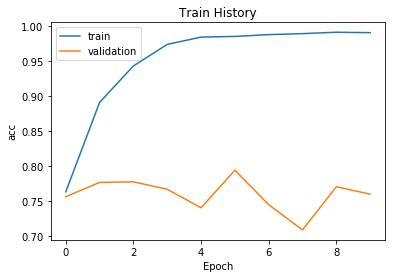

In [19]:
show_train_history(train_history,'acc','val_acc')

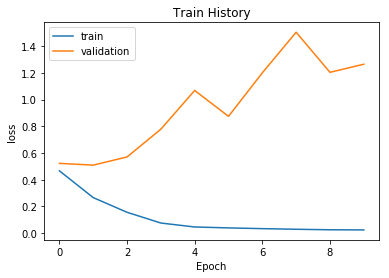

In [20]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [21]:
scores = model.evaluate(x_test, y_test, verbose=1)
scores[1]

24352/25000 [============================>.] - ETA: 0s

0.81188000000000005

# 預測機率

In [22]:
probility=model.predict(x_test)

In [23]:
probility[:10]

array([[ 0.99973041],
       [ 0.99996483],
       [ 0.48343313],
       [ 1.        ],
       [ 0.99998915],
       [ 0.9999783 ],
       [ 0.99999869],
       [ 0.98805064],
       [ 0.9999994 ],
       [ 0.99989271]], dtype=float32)

In [24]:
for p in probility[12500:12510]:
    print(p)

[ 0.00407241]
[  1.18206583e-10]
[  4.99687625e-10]
[  5.85693087e-05]
[ 0.95798761]
[  5.89665433e-07]
[ 0.99830329]
[  2.84112333e-14]
[  3.13559880e-08]
[ 0.99992752]


# 預測結果

In [25]:
predict=model.predict_classes(x_test)

24256/25000 [============================>.] - ETA: 0s

In [26]:
predict[:10]

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [27]:
predict_classes=predict.reshape(-1)
predict_classes[:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

# 查看預測結果

In [28]:
SentimentDict={1:'正面的',0:'負面的'}
def display_test_Sentiment(i):
    print(test_text[i])
    print('標籤label:',SentimentDict[y_test[i]],
          '預測結果:',SentimentDict[predict_classes[i]])

In [29]:
display_test_Sentiment(2)

As a recreational golfer with some knowledge of the sport's history, I was pleased with Disney's sensitivity to the issues of class in golf in the early twentieth century. The movie depicted well the psychological battles that Harry Vardon fought within himself, from his childhood trauma of being evicted to his own inability to break that glass ceiling that prevents him from being accepted as an equal in English golf society. Likewise, the young Ouimet goes through his own class struggles, being a mere caddie in the eyes of the upper crust Americans who scoff at his attempts to rise above his standing. What I loved best, however, is how this theme of class is manifested in the characters of Ouimet's parents. His father is a working-class drone who sees the value of hard work but is intimidated by the upper class; his mother, however, recognizes her son's talent and desire and encourages him to pursue his dream of competing against those who think he is inferior.Finally, the golf scenes

In [30]:
predict_classes[12500:12510]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [31]:
display_test_Sentiment(12502)

First of all I hate those moronic rappers, who could'nt act if they had a gun pressed against their foreheads. All they do is curse and shoot each other and acting like cliché'e version of gangsters.The movie doesn't take more than five minutes to explain what is going on before we're already at the warehouse There is not a single sympathetic character in this movie, except for the homeless guy, who is also the only one with half a brain.Bill Paxton and William Sadler are both hill billies and Sadlers character is just as much a villain as the gangsters. I did'nt like him right from the start.The movie is filled with pointless violence and Walter Hills specialty: people falling through windows with glass flying everywhere. There is pretty much no plot and it is a big problem when you root for no-one. Everybody dies, except from Paxton and the homeless guy and everybody get what they deserve.The only two black people that can act is the homeless guy and the junkie but they're actors by 

In [32]:
#預測新的影評

In [33]:
input_text='''
Oh dear, oh dear, oh dear: where should I start folks. I had low expectations already because I hated each and every single trailer so far, but boy did Disney make a blunder here. I'm sure the film will still make a billion dollars - hey: if Transformers 11 can do it, why not Belle? - but this film kills every subtle beautiful little thing that had made the original special, and it does so already in the very early stages. It's like the dinosaur stampede scene in Jackson's King Kong: only with even worse CGI (and, well, kitchen devices instead of dinos).
The worst sin, though, is that everything (and I mean really EVERYTHING) looks fake. What's the point of making a live-action version of a beloved cartoon if you make every prop look like a prop? I know it's a fairy tale for kids, but even Belle's village looks like it had only recently been put there by a subpar production designer trying to copy the images from the cartoon. There is not a hint of authenticity here. Unlike in Jungle Book, where we got great looking CGI, this really is the by-the-numbers version and corporate filmmaking at its worst. Of course it's not really a "bad" film; those 200 million blockbusters rarely are (this isn't 'The Room' after all), but it's so infuriatingly generic and dull - and it didn't have to be. In the hands of a great director the potential for this film would have been huge.
Oh and one more thing: bad CGI wolves (who actually look even worse than the ones in Twilight) is one thing, and the kids probably won't care. But making one of the two lead characters - Beast - look equally bad is simply unforgivably stupid. No wonder Emma Watson seems to phone it in: she apparently had to act against an guy with a green-screen in the place where his face should have been. 
'''

In [34]:
input_seq = token.texts_to_sequences([input_text])

In [35]:
len(input_seq[0])

285

In [36]:
pad_input_seq  = sequence.pad_sequences(input_seq , maxlen=100)

In [37]:
len(pad_input_seq[0])

100

In [38]:
predict_result=model.predict_classes(pad_input_seq)

1/1 [==============================] - 0s


In [39]:
predict_result[0][0]

0

In [40]:
SentimentDict[predict_result[0][0]]

'負面的'

In [41]:
def predict_review(input_text):
    input_seq = token.texts_to_sequences([input_text])
    pad_input_seq  = sequence.pad_sequences(input_seq , maxlen=100)
    predict_result=model.predict_classes(pad_input_seq)
    print(SentimentDict[predict_result[0][0]])

In [43]:
predict_review('''
It's hard to believe that the same talented director who made the influential cult action classic The Road Warrior had anything to do with this disaster.
Road Warrior was raw, gritty, violent and uncompromising, and this movie is the exact opposite. It's like Road Warrior for kids who need constant action in their movies.
This is the movie. The good guys get into a fight with the bad guys, outrun them, they break down in their vehicle and fix it. Rinse and repeat. The second half of the movie is the first half again just done faster.
The Road Warrior may have been a simple premise but it made you feel something, even with it's opening narration before any action was even shown. And the supporting characters were given just enough time for each of them to be likable or relatable.
In this movie there is absolutely nothing and no one to care about. We're supposed to care about the characters because... well we should. George Miller just wants us to, and in one of the most cringe worthy moments Charlize Theron's character breaks down while dramatic music plays to try desperately to make us care.
Tom Hardy is pathetic as Max. One of the dullest leading men I've seen in a long time. There's not one single moment throughout the entire movie where he comes anywhere near reaching the same level of charisma Mel Gibson did in the role. Gibson made more of an impression just eating a tin of dog food. I'm still confused as to what accent Hardy was even trying to do.
I was amazed that Max has now become a cartoon character as well. Gibson's Max was a semi-realistic tough guy who hurt, bled, and nearly died several times. Now he survives car crashes and tornadoes with ease?
In the previous movies, fuel and guns and bullets were rare. Not anymore. It doesn't even seem Post-Apocalyptic. There's no sense of desperation anymore and everything is too glossy looking. And the main villain's super model looking wives with their perfect skin are about as convincing as apocalyptic survivors as Hardy's Australian accent is. They're so boring and one-dimensional, George Miller could have combined them all into one character and you wouldn't miss anyone.
Some of the green screen is very obvious and fake looking, and the CGI sandstorm is laughably bad. It wouldn't look out of place in a Pixar movie.
There's no tension, no real struggle, or any real dirt and grit that Road Warrior had. Everything George Miller got right with that masterpiece he gets completely wrong here. 
''')

1/1 [==============================] - 0s
負面的
